# **플라스틱 생산량과 재활용하지 않는 폐기량을 알아보자.**
### 플라스틱은 생산단계에서  61% , 가공 단계에서 30%, 소각 등 영구폐기 단계에서 9%의 이산화탄소가 각각 배출된다. 

 이산화탄소는 온실가스의 주범으로 여겨지는 가장 대표적인 환경오염 물질이다. 
 
 플라스틱의 생산 단계에서 가장 많은 이산화탄소가 배출 된다는 충격적인 결과를 보았으니, 전세계적인 플라스틱 총 생산량에 관한 데이터를 분석해보고자 한다.




In [ ]:
!pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 97.4 MB/s eta 0:00:00


In [ ]:
!pip install pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 23.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.

In [ ]:
import os
import geemap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

global_plastic_pollution상황 분석
세계적인 플라스틱 생산량 시각화

dataset : global plastics production

In [ ]:
production = pd.read_csv('/content/plastic_pollution/global-plastics-production.csv')
production.head(5)

,Entity,Code,Year,Global plastics production (million tonnes)
0,World,OWID_WRL,1950,2000000
1,World,OWID_WRL,1951,2000000
2,World,OWID_WRL,1952,2000000
3,World,OWID_WRL,1953,3000000
4,World,OWID_WRL,1954,3000000


In [ ]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Entity                                       66 non-null     object
 1   Code                                         66 non-null     object
 2   Year                                         66 non-null     int64 
 3   Global plastics production (million tonnes)  66 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ KB


In [ ]:
production.shape

(66, 4)

In [ ]:
production.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,66.0,1.982500e+03,1.919635e+01,1950.0,1966.25,1982.5,1.998750e+03,2015.0
Global plastics production (million tonnes),66.0,1.185303e+08,1.126182e+08,2000000.0,20750000.00,76500000.0,1.985000e+08,381000000.0


In [ ]:
print ('플라스틱 생산량 자료 : {} ~ {}'.format(min(production.Year),max(production.Year)))

플라스틱 생산량 자료 : 1950 ~ 2015


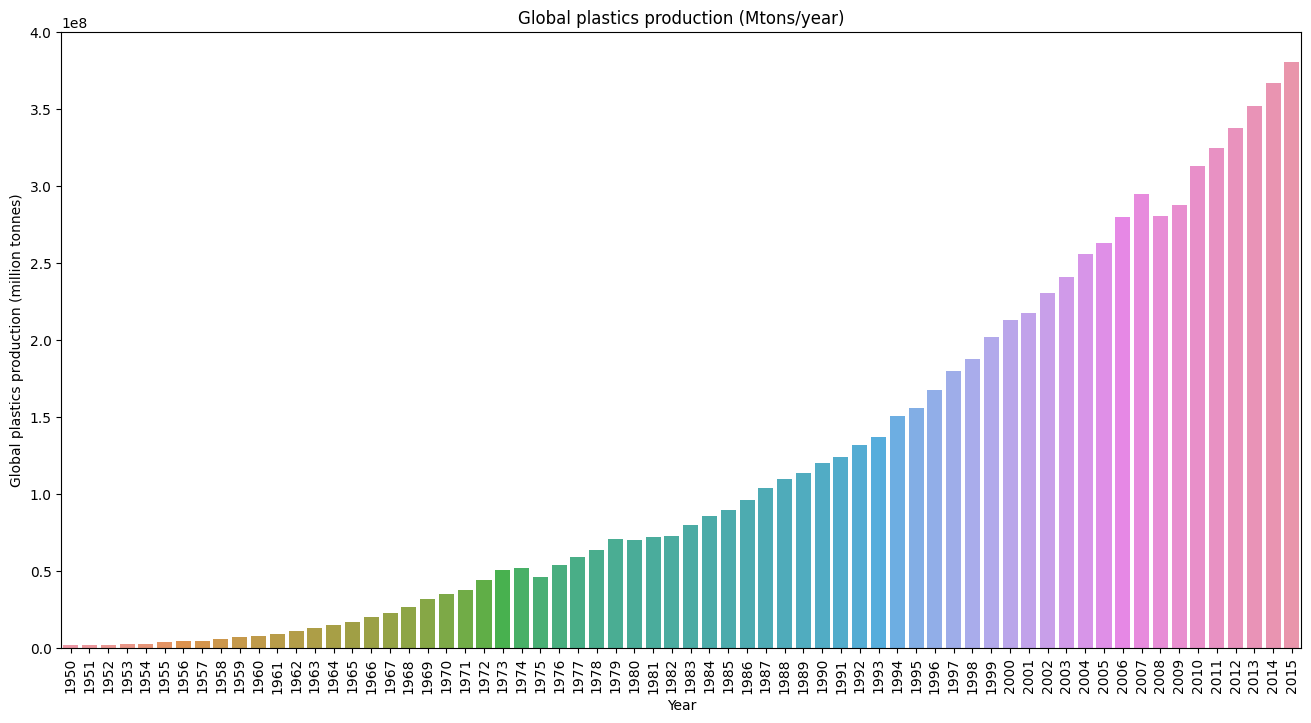

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=production['Year'], y=production['Global plastics production (million tonnes)'])
plt.title('Global plastics production (Mtons/year)')
plt.xticks(rotation=90)
plt.show()

전셰계적으로 plastic 생산량은 꾸준히 증가하는 경향을 보이고있다. 이렇게 많은 플라스틱을 생산하고 , 사용하고 나면 그 많은 플라스틱은 어디로 가는걸까?

재활용이 되지 않는 플라스틱 쓰레기는 인간의 이기심으로 인해 세계적인 재앙이 되었다. 플라스틱 쓰레기를 재활용하지 않고 쓰레기로 버리는 데이터를 분석해본다. 2010년 global data를 사용했다. 

# dataset : misnanaged waste global total

In [ ]:
mwgt = pd.read_csv('/content/plastic_pollution/mismanaged-waste-global-total.csv')
mwgt.head(10)

,Entity,Code,Year,Mismanaged waste (% global total)
0,Albania,ALB,2010,0.0933
1,Algeria,DZA,2010,1.6347
2,Angola,AGO,2010,0.1964
3,Anguilla,AIA,2010,0.0002
4,Antigua and Barbuda,ATG,2010,0.0039
5,Argentina,ARG,2010,0.4955
6,Aruba,ABW,2010,0.0012
7,Australia,AUS,2010,0.0436
8,Bahamas,BHS,2010,0.0042
9,Bahrain,BHR,2010,0.0137


In [ ]:
mwgt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             186 non-null    object 
 1   Code                               186 non-null    object 
 2   Year                               186 non-null    int64  
 3   Mismanaged waste (% global total)  186 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.9+ KB


In [ ]:
mwgt.isnull().sum()

Entity                               0
Code                                 0
Year                                 0
Mismanaged waste (% global total)    0
dtype: int64

In [ ]:
mwgt.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,186.0,2010.000000,0.000000,2010.0,2010.00000,2010.0000,2010.000000,2010.0000
Mismanaged waste (% global total),186.0,0.537634,2.298779,0.0,0.00685,0.0502,0.208175,27.6966


In [ ]:
sum=0
for country in mwgt['Mismanaged waste (% global total)']:
  sum += country
print(round(sum))

100


In [ ]:
mwgt[mwgt['Mismanaged waste (% global total)'] == max(mwgt['Mismanaged waste (% global total)'])]

,Entity,Code,Year,Mismanaged waste (% global total)
28,China,CHN,2010,27.6966


In [ ]:
mwgt[mwgt['Mismanaged waste (% global total)'] == min(mwgt['Mismanaged waste (% global total)'])]

,Entity,Code,Year,Mismanaged waste (% global total)
29,Christmas Island,CXR,2010,0.0
30,Cocos Islands,CCK,2010,0.0
53,Falkland Islands,FLK,2010,0.0
122,Niue,NIU,2010,0.0
145,Saint Pierre and Miquelon,SPM,2010,0.0


In [ ]:
mwgt[mwgt["Code"] == "KOR"]

,Entity,Code,Year,Mismanaged waste (% global total)
159,South Korea,KOR,2010,0.106


In [ ]:
world_map= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map.head()

<ipython-input-45-a2ab7c88ae67>:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world_map.columns=['pop_set', 'Continent', 'Entity', 'Code', 'gdp_md_set','geometry']
world_map.head(10)

,pop_set,Continent,Entity,Code,gdp_md_set,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,270625568.0,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44938712.0,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


Text(0.5, 1.0, 'Mismanaged waste in 2010')

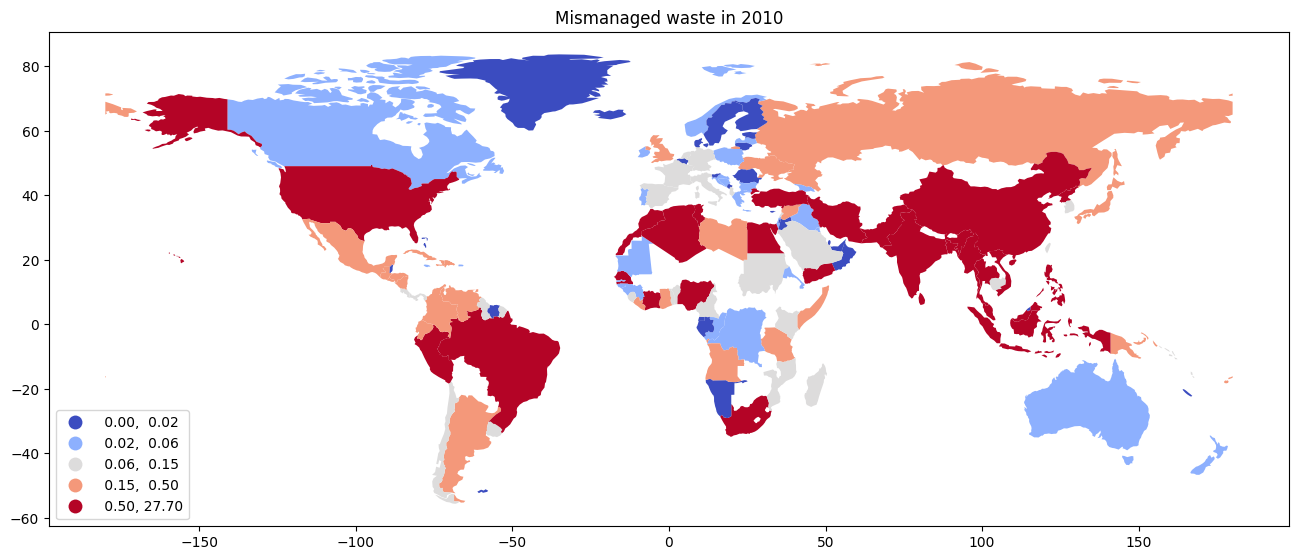

In [ ]:
world = pd.merge(world_map,mwgt, on='Code')
world.plot(column='Mismanaged waste (% global total)', scheme='quantiles', legend= True, figsize=(16,8), cmap='coolwarm',legend_kwds={'loc': 'lower left'})
plt.title('Mismanaged waste in 2010')

### 한국의 mismanaged waste ( % global total) 은 0.106





In [ ]:
sort_mwgt=mwgt.sort_values(by=['Mismanaged waste (% global total)'], ascending=False)
sort_mwgt.head()

,Entity,Code,Year,Mismanaged waste (% global total)
28,China,CHN,2010,27.6966
80,Indonesia,IDN,2010,10.1019
134,Philippines,PHL,2010,5.9153
184,Vietnam,VNM,2010,5.7588
161,Sri Lanka,LKA,2010,4.9968


In [ ]:
sort_mwgt['Rank'] = sort_mwgt['Mismanaged waste (% global total)'].rank(ascending=False)
sort_mwgt.head()

,Entity,Code,Year,Mismanaged waste (% global total),Rank
28,China,CHN,2010,27.6966,1.0
80,Indonesia,IDN,2010,10.1019,2.0
134,Philippines,PHL,2010,5.9153,3.0
184,Vietnam,VNM,2010,5.7588,4.0
161,Sri Lanka,LKA,2010,4.9968,5.0


In [ ]:
row_index = 159
rank = sort_mwgt.loc[row_index, 'Rank']
print(f"한국의 순위는 : {rank}")

한국의 순위는 : 66.0
